In [1]:
import os
import sys
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(repo_root)

from src.utils.file_handlers import read_file_parameters


In [2]:
def convergence_file_handlers():
    data_path = os.path.join(os.getcwd(), 'data')

    all_results = []
    for file in os.listdir(data_path):
        if file.endswith('.csv'):
            result = read_file_parameters(file)
            result['avg_HO_iteration'] = 10000
            result['avg_PL_iteration'] = 10000

            file_path = os.path.join(data_path, file)
            df = pd.read_csv(file_path)
            #first iteration error is 0 
            df = df.iloc[1:]

            row_ho = df[df['Avg_HO_Error'] < 1e-10].head(1)
            if not row_ho.empty:
                result['avg_HO_iteration'] = row_ho['Iteration'].values[0]
            
            # Find the first row where Avg_PL_Error is below the threshold
            row_pl = df[df['Avg_PL_Error'] < 1e-10].head(1)
            if not row_pl.empty:
                result['avg_PL_iteration'] = row_pl['Iteration'].values[0]


            all_results.append(result)


    df = pd.DataFrame(all_results)
    numeric_columns = ['avg_HO_iteration', 'avg_PL_iteration']
    final_df = df.groupby('dataset')[numeric_columns].mean().reset_index()
    final_df['dataset'] = pd.to_numeric(final_df['dataset'], errors='coerce')
    return final_df.sort_values(by='dataset')


def visualize_df(df, title):
    print(f"\n{title}\n")
    styled_df = df.style.set_table_styles(
    ).set_properties(**{
        'background-color': 'LightGray',
        'color': 'black',
        'border-color': 'black',
        'border-style': 'solid',
        'border-width': '1px',
        'text-align': 'left'
    })
    styled_df = styled_df.format(precision=4)

    # print(df.to_latex(escape=True))
    display(styled_df)


In [3]:

df = convergence_file_handlers()
df.to_csv('results/convergence_table.csv')

In [4]:
title = "Convergence Results of Plackett-Luce and generalized BT"
visualize_df(df, title)


Convergence Results of Plackett-Luce and generalized BT



,dataset,avg_HO_iteration,avg_PL_iteration
0,1,10000.0000,10000.0000
4,2,933.4000,1658.9600
13,4,138.6000,327.1600
18,6,1548.7200,3238.4400
19,7,16.2800,30.0000
20,8,10000.0000,10000.0000
21,9,13.6400,1494.4400
1,12,13.2000,25.5600
2,14,35.4400,45.8400
3,18,5667.0800,10000.0000


(array([49., 28., 12.,  5.,  2.,  2.,  1.,  0.,  0.,  1.]),
 array([0.04954344, 0.88017495, 1.71080646, 2.54143797, 3.37206948,
        4.20270099, 5.0333325 , 5.86396402, 6.69459553, 7.52522704,
        8.35585855]),
 <BarContainer object of 10 artists>)

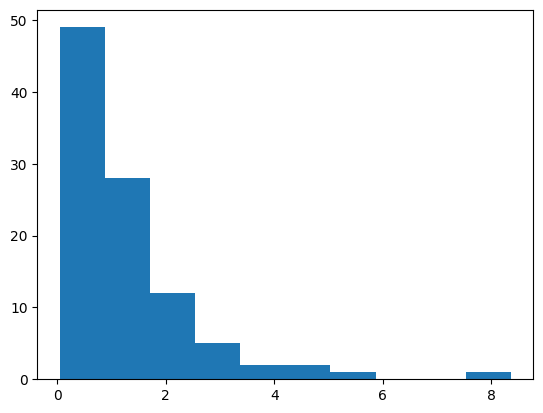

In [42]:
from scipy.stats import logistic
scores = np.sqrt(np.exp(logistic.rvs(size=100)))
plt.hist(scores)
